# Notebook 2- CSCI 3022: Mauna Loa EDA

## Live Guided Discussion Through Notebook 1:  [Tuesday 5-6pm MT via Zoom](https://cuboulder.zoom.us/j/94232294549)

[Acknowledgments Page](https://ds100.org/fa23/acks/)

# <b>E</b><i>xploratory</i>
# <b>D</b><i>ata</i>
# <b>A</b><i>nalysis</i>

A demo of data cleaning and exploratory data analysis using the Mauna Loa CO2 data.

In [1]:
import numpy as np
import pandas as pd

/var/folders/2p/d_nj_y2s0p32_2p156bn343c0000gn/T/ipykernel_26685/1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
# This option stops scientific notation for pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Silence some spurious seaborn warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

---


## Data Faithfulness: Mauna Loa CO2 data

CO2 concentrations have been monitored at Mauna Loa Observatory since 1958 ([website link](https://gml.noaa.gov/ccgg/trends/data.html)).

The carbon dioxide data on Mauna Loa constitute the longest record of direct measurements of CO2 in the atmosphere. They were started by C. David Keeling of the Scripps Institution of Oceanography in March of 1958 at a facility of the National Oceanic and Atmospheric Administration [Keeling, 1976]. NOAA started its own CO2 measurements in May of 1974, and they have run in parallel with those made by Scripps since then [Thoning, 1989].




Let's do some **EDA**!!

1. How big is the data?
I often like to start my analysis by getting a rough estimate of the size of the data. This will help inform the tools I use and how I view the data. If it is relatively small I might use a text editor or a spreadsheet to look at the data. If it is larger, I might jump to more programmatic exploration or even used distributed computing tools.

However here we will use python tools to probe the file.



In [5]:
import os
co2_file = "data/co2_mm_mlo.txt"
print(co2_file, "is", os.path.getsize(co2_file) / 1e6, "MB")

data/co2_mm_mlo.txt is 0.051131 MB


I might also want to investigate the number of lines, which often corresponds to the number of records.

In [6]:
### option 1
with open(co2_file, "r") as f:
    print(co2_file, "is", sum(1 for l in f), "lines")

data/co2_mm_mlo.txt is 810 lines


In [8]:
### option 2

f = open(co2_file, "r")  #same result
lines = f.readlines()
len(lines)

810

### How do we read the file into Pandas?
Let's instead check out this file with JupyterLab.

* Note it's a `.txt` file.
* Do we trust this file extension?
* What structure is it?


---


Looking at the first few lines of the data, we spot some relevant characteristics:

- The values are separated by white space, possibly tabs.
- The data line up down the rows. For example, the month appears in 7th to 8th position of each line.
- The 71st and 72nd lines in the file contain column headings split over two lines.

It turns out we can use the function `read_csv` (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to read the data into a Pandas data frame, and we provide several arguments to specify that the separators are white space, there is no header (**we will set our own column names**), and to skip the first 72 rows of the file.

In [ ]:
###

Congratulations! You've wrangled the data!

<br/>

...But our columns aren't named.
**We need to do more EDA.**

### Exploring Variable Feature Types

The NOAA [webpage](https://gml.noaa.gov/ccgg/trends/) might have some useful tidbits (in this case it doesn't).
Let's go back to the raw data file to identify each feature.


We'll rerun `pd.read_csv`, but this time with some **custom column names.**

In [9]:
### 
#skip rows basically skip 72 rows before we get to the meaningful data
#sep: basically says that we (it uses regex by the way) are seperating the columns by variable spacing \s where the + means 1 or more space
co2 = pd.read_csv( #not all columns have headers
    co2_file, header= None, skiprows= 72, sep=r'\s+'
)
co2.head() #problem? the columns do not have names

,0,1,2,3,4,5,6
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
3,1958,6,1958.46,-99.99,317.10,314.85,-1
4,1958,7,1958.54,315.86,315.86,314.98,-1


In [11]:
# what are the data types we are working with?
###

col_names = ["Yr", "Mo", "DecDate", "Avg", "Int", "Trend", "Days"]

co2 = pd.read_csv( #not all columns have headers
    co2_file, header= None, skiprows= 72, sep=r'\s+', names=col_names
)
co2.head() #now we have the names argument which sets the column names for the data set using a list as seen above. Check the data and see

,Yr,Mo,DecDate,Avg,Int,Trend,Days
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
3,1958,6,1958.46,-99.99,317.10,314.85,-1
4,1958,7,1958.54,315.86,315.86,314.98,-1


In [12]:
co2.dtypes #this shows the data types of the dataframe that we have right now

Yr           int64
Mo           int64
DecDate    float64
Avg        float64
Int        float64
Trend      float64
Days         int64
dtype: object

### Visualizing CO2 

Scientific studies tend to have very clean data, right...? Let's jump right in and make a time series plot of CO2 monthly averages.

The code below uses the `seaborn` plotting library (abbreviated `sns`). We will cover this next class, but now you don't need to worry about how it works!


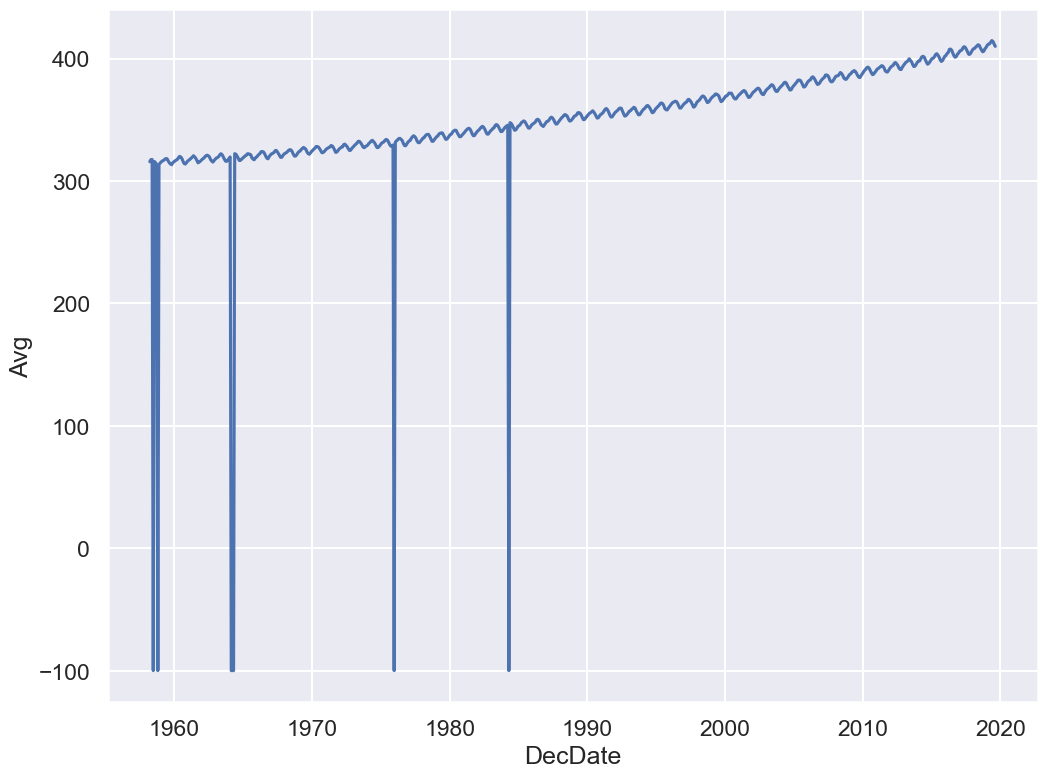

In [13]:
sns.lineplot(x='DecDate', y='Avg', data=co2); # suppresses unneeded plotting output
#it looks weird: there is a trend but some of the points or spikes that go way downwards. Those are missing data where they replace them with negative numbers

Yikes! Plotting the data uncovered a problem. It looks like we have some **missing values**. What happened here? 

In [14]:
### first 5 rows
co2.head()

,Yr,Mo,DecDate,Avg,Int,Trend,Days
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
3,1958,6,1958.46,-99.99,317.10,314.85,-1
4,1958,7,1958.54,315.86,315.86,314.98,-1


In [15]:
### last 5 rows
co2.tail()

,Yr,Mo,DecDate,Avg,Int,Trend,Days
733,2019,4,2019.29,413.32,413.32,410.49,26
734,2019,5,2019.38,414.66,414.66,411.20,28
735,2019,6,2019.46,413.92,413.92,411.58,27
736,2019,7,2019.54,411.77,411.77,411.43,23
737,2019,8,2019.62,409.95,409.95,411.84,29


Some data have unusual values like -1 and -99.99.

Let's check the description at the top of the file again.
1. -1 signifies a missing value for the number of days `Days` the equipment was in operation that month.
1. -99.99 denotes a missing monthly average `Avg`

How can we fix this? First, let's explore other aspects of our data. Understanding our data will help us decide what to do with the missing values.

<br/>


### Sanity Checks: Reasoning about the data
First, we consider the shape of the data. How many rows should we have?
* If chronological order, we should have one record per month.
* Data from March 1958 to August 2019.
* We should have $ 12 \times (2019-1957) - 2 - 4 = 738 $ records.

In [16]:
###

co2.shape

(738, 7)

Nice!! The number of rows (i.e. records) match our expectations.

<br/><br/>

---

Let's now check the quality of each feature.

### Understanding Missing Value 1: `Days`
`Days` is a time field, so let's analyze other time fields to see if there is an explanation for missing values of days of operation.

Let's start with **months** `Mo`.

Are we missing any records? The number of months should have 62 or 61 instances (March 1957-August 2019).

In [20]:
###
co2["Mo"].value_counts().sort_index() #do not forget the paranthesis for value counts

#this means there are about 61 or 62 rows for each month shown

Mo
1     61
2     61
3     62
4     62
5     62
6     62
7     62
8     62
9     61
10    61
11    61
12    61
Name: count, dtype: int64

As expected Jan, Feb, Sep, Oct, Nov, and Dec have 61 occurrences and the rest 62.

<br/><br/>

Next let's explore **days** `Days` itself, which is the number of days that the measurement equipment worked.

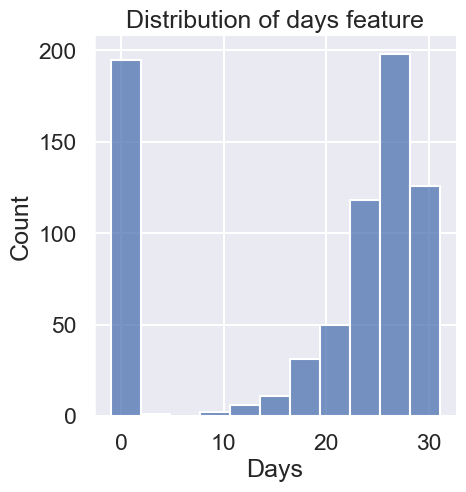

In [21]:
sns.displot(co2['Days']);
plt.title("Distribution of days feature"); # suppresses unneeded plotting output

In terms of data quality, a handful of months have averages based on measurements taken on fewer than half the days. In addition, there are nearly 200 missing values--**that's about 27% of the data**!

<br/><br/>

Finally, let's check the last time feature, **year** `Yr`.

Let's check to see if there is any connection between missingness and the year of the recording by using a scatterplot

Text(0.5, 1.0, 'Day filed by year')

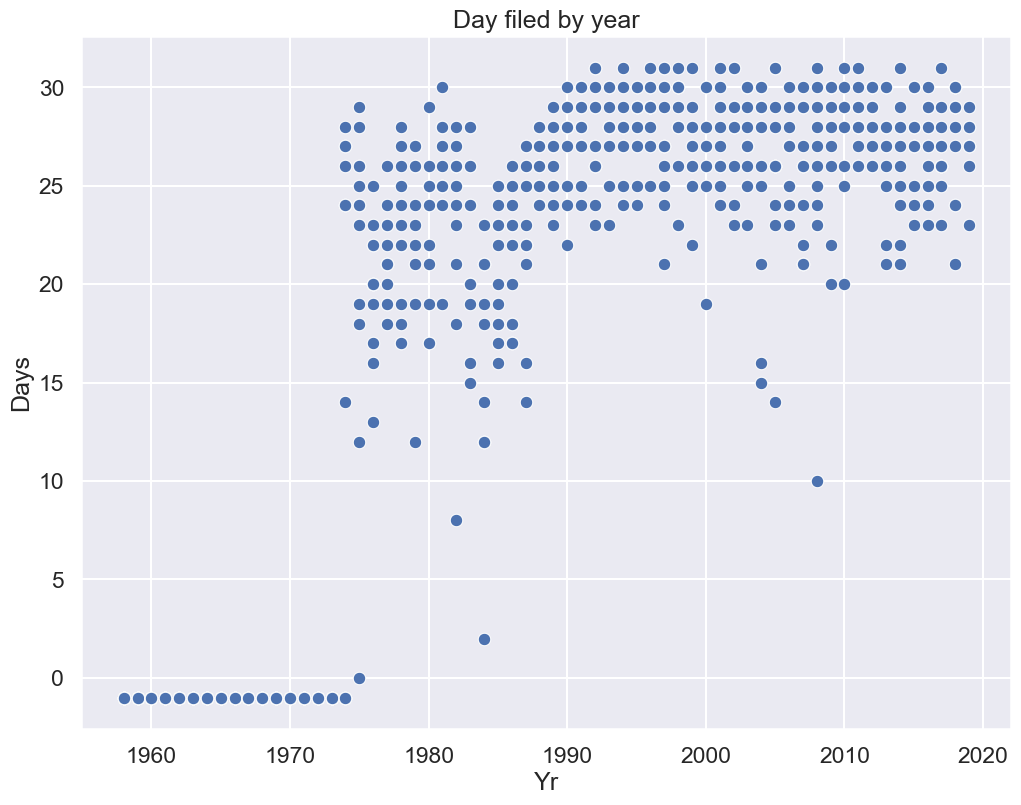

In [22]:
sns.scatterplot(x = "Yr", y = "Days", data=co2);

plt.title("Day filed by year") #aybe equipment not working in the first few years in the 70's

**Observations**:

* All of the missing data are in the early years of operation.
* It appears there may have been problems with equipment in the mid to late 80s.

**Potential Next Steps**:
* Confirm these explanations through documentation about the historical readings.
* Maybe drop earliest recordings? However, we would want to delay such action until after we have examined the time trends and assess whether there are any potential problems.

---
<br/><br/>

### Understanding Missing Value 2: `Avg`
Next, let's return to the -99.99 values in `Avg` to analyze the overall quality of the CO2 measurements.

<Axes: xlabel='Avg', ylabel='Count'>

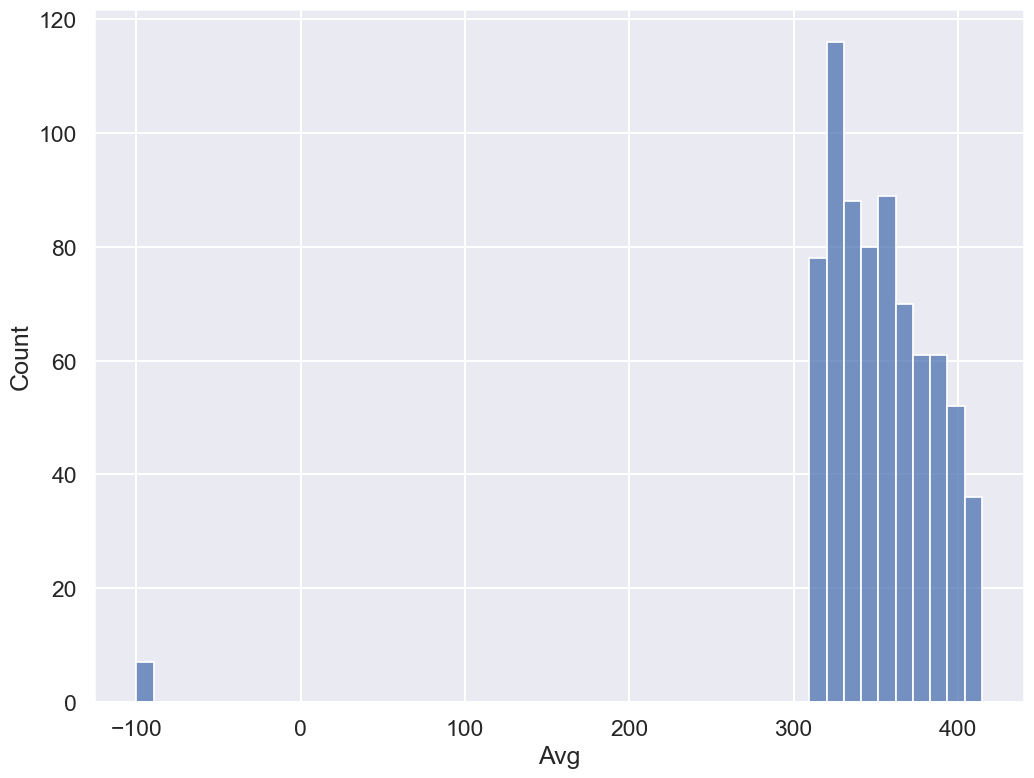

In [24]:
# Histograms of average CO2 measurements
sns.histplot(co2["Avg"])

The non-missing values are in the 300-400 range (a regular range of CO2 levels).

We also see that there are only a few missing `Avg` values (**<1% of values**). Let's examine all of them:

In [25]:
### 
co2[(co2["Avg"] < 0)] #as you can see, we filtered the data with the negative averages

,Yr,Mo,DecDate,Avg,Int,Trend,Days
3,1958,6,1958.46,-99.99,317.10,314.85,-1
7,1958,10,1958.79,-99.99,312.66,315.61,-1
71,1964,2,1964.12,-99.99,320.07,319.61,-1
72,1964,3,1964.21,-99.99,320.73,319.55,-1
73,1964,4,1964.29,-99.99,321.77,319.48,-1
213,1975,12,1975.96,-99.99,330.59,331.60,0
313,1984,4,1984.29,-99.99,346.84,344.27,2


There doesn't seem to be a pattern to these values, other than that most records also were missing `Days` data.

### Drop, `NaN`, or Impute Missing `Avg` Data?

How should we address the invalid `Avg` data?

A. Drop records

B. Set to NaN

C. Impute using some strategy

Remember we want to fix the following plot:

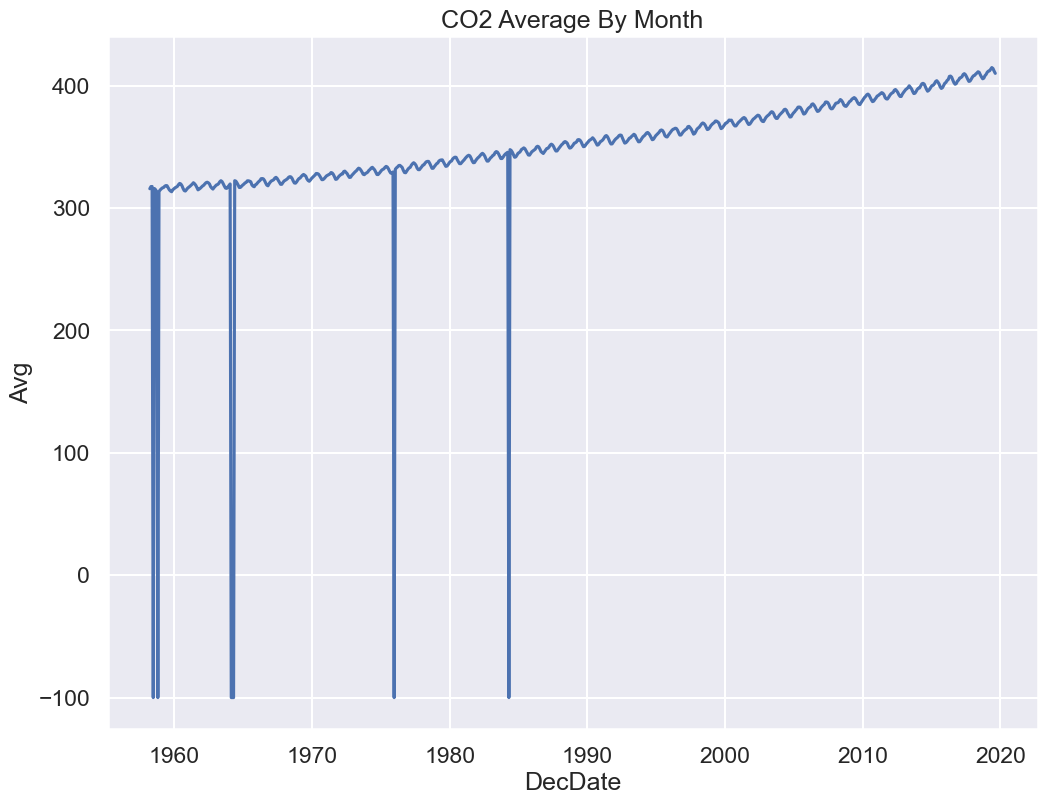

In [26]:
sns.lineplot(x='DecDate', y='Avg', data=co2)
plt.title("CO2 Average By Month");

Since we are plotting `Avg` vs `DecDate`, we should just focus on dealing with missing values for `Avg`.

Let's consider a few options:
1. Drop those records
1. Replace -99.99 with NaN
1. Substitute it with a likely value for the average CO2?

What do you think are the pros and cons of each possible action?

---
<br/><br/>
Let's examine each of these three options.

In [32]:
# 1. Drop missing values

co2_drop = co2[(co2["Avg"] > 0)]

# 2. Replace NaN with -99.99

co2_NA = co2.replace(-99.99, np.nan) ##very great keyword that replaces -99.99 with any values you want, such as Nan

We'll also use a third version of the data.
First, we note that the dataset already comes with a **substitute value** for the -99.99.

From the file description:

>  The `interpolated` column includes average values from the preceding column (`average`)
and **interpolated values** where data are missing.  Interpolated values are
computed in two steps...

The `Int` feature has values that exactly match those in `Avg`, except when `Avg` is -99.99, and then a **reasonable** estimate is used instead.
So, the third version of our data will use the `Int` feature instead of `Avg`.

In [30]:
# 3. Use interpolated column which estimates missing Avg values

co2_impute = co2.copy() #why is this important ? becauase sometimes when you just assign the original data to a variable and then change that variable, sometimes that variable is pointing to the original data which might change the original data unintetnionally

co2_impute["Avg"] = co2_impute["Int"] 

<br/>

---

What's a **reasonable** estimate?

To answer this question, let's zoom in on a short time period, say the measurements in 1958 (where we know we have two missing values).


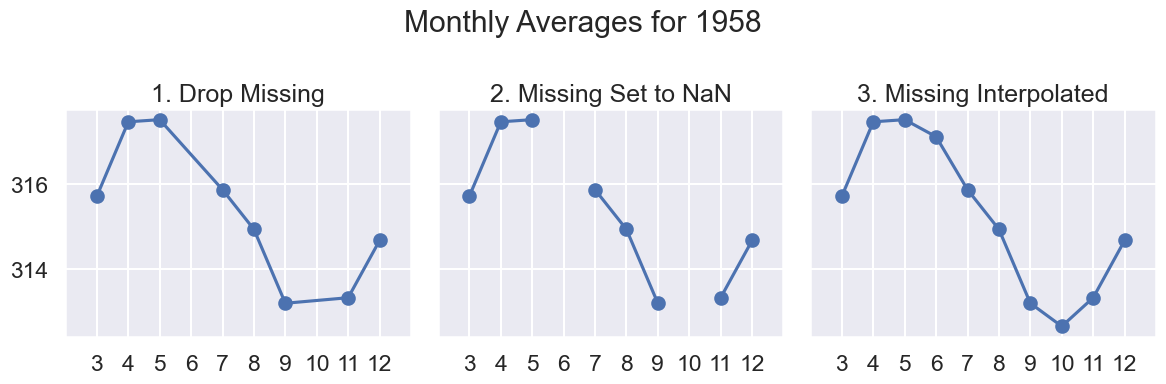

In [33]:
# results of plotting data in 1958

def line_and_points(data, ax, title):
    # assumes single year, hence Mo
    ax.plot('Mo', 'Avg', data=data)
    ax.scatter('Mo', 'Avg', data=data)
    ax.set_xlim(2, 13)
    ax.set_title(title)
    ax.set_xticks(np.arange(3, 13))

def data_year(data, year):
    return data[data["Yr"] == 1958]
    
# uses matplotlib subplots
# you may see more next week; focus on output for now
fig, axes = plt.subplots(ncols = 3, figsize=(12, 4), sharey=True)

year = 1958
line_and_points(data_year(co2_drop, year), axes[0], title="1. Drop Missing")
line_and_points(data_year(co2_NA, year), axes[1], title="2. Missing Set to NaN")
line_and_points(data_year(co2_impute, year), axes[2], title="3. Missing Interpolated")

fig.suptitle(f"Monthly Averages for {year}")
plt.tight_layout()

In the big picture since there are only 7 `Avg` values missing (**<1%** of 738 months), any of these approaches would work.

However there is some appeal to **option C: Imputing**:
* Shows seasonal trends for CO2
* We are plotting all months in our data as a line plot

<br/>

---
Let's replot our original figure with option 3:

<Axes: xlabel='DecDate', ylabel='Avg'>

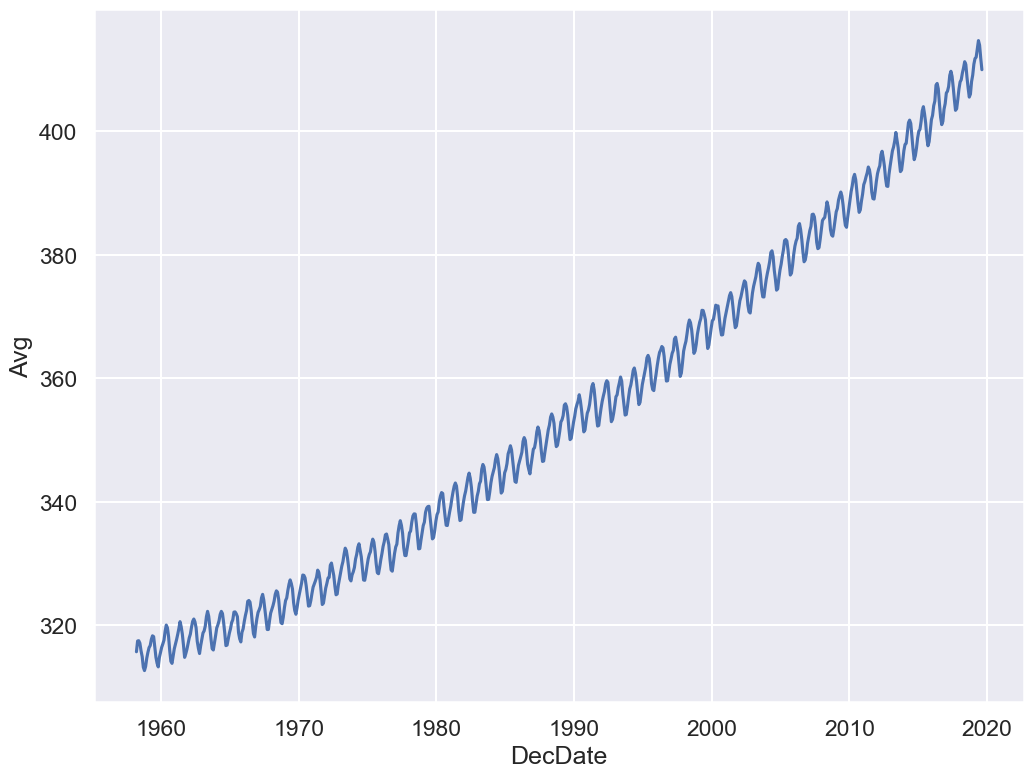

In [35]:
### 

sns.lineplot(x = "DecDate", y = "Avg", data=co2_impute) #it looks much smoother when we do it that way

Looks pretty close to what we see on the NOAA [website](https://gml.noaa.gov/ccgg/trends/)!

### Presenting the data: A Discussion on Data Granularity

From the description:
* monthly measurements are averages of average day measurements.
* The NOAA GML website has datasets for daily/hourly measurements too.

The data you present depends on your research question.

**How do CO2 levels vary by season?**
* You might want to keep average monthly data.

**Are CO2 levels rising over the past 50+ years, consistent with global warming predictions?**
* You might be happier with a **coarser granularity** of average year data!

Text(0.5, 1.0, 'CO2 average by year')

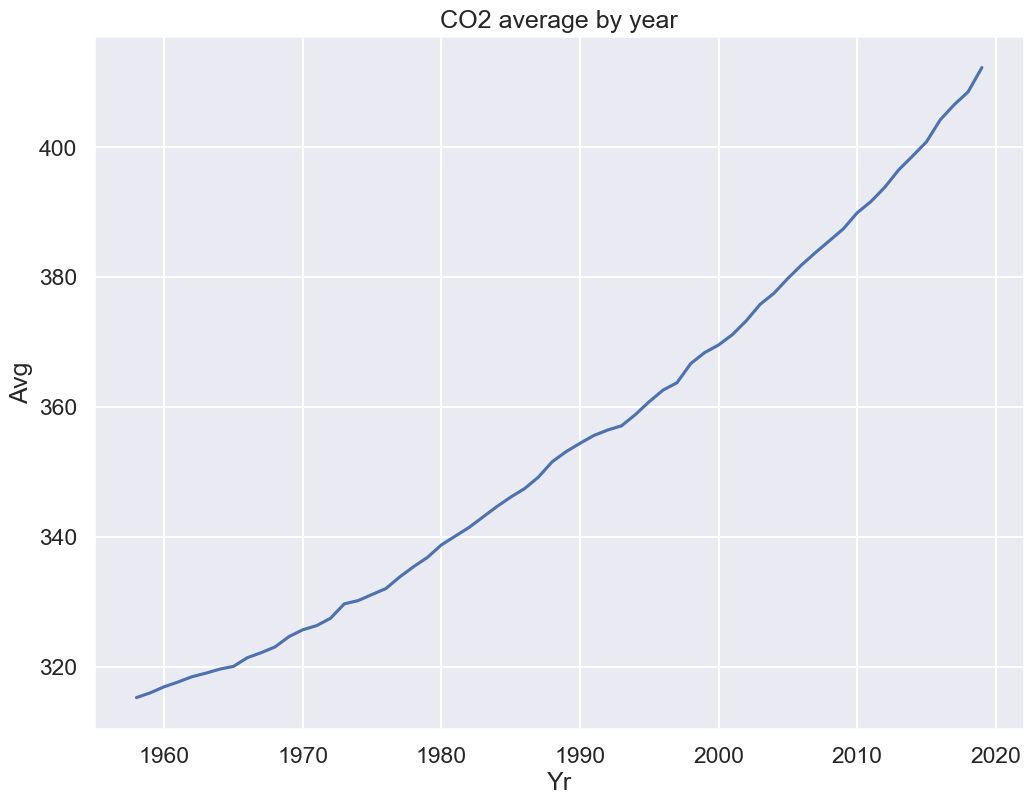

In [36]:
###
co2_year = co2_impute.groupby("Yr").mean()

sns.lineplot(x = "Yr", y = "Avg", data = co2_year)
plt.title("CO2 average by year")

Indeed, we see a rise by nearly 100 ppm of CO2 since Mauna Loa began recording in 1958.